# Wikimedia Data Scraping: UK Parliamentary Consituencies
#### Coursework for DS105A: Data for Data Science

**Importing Necessary Packages and Libraries**

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

%run './NB01 - Data Collection.ipynb'

data = './data/all_constituencies.csv'
df_all_constituencies = pd.read_csv(data)

#### Displaying Data from the DataFrame
Initially, I will present the some of the data found within my DataFrame that requires little-to-no manipulation.

1. Number of Current vs. Abolished Constituencies.

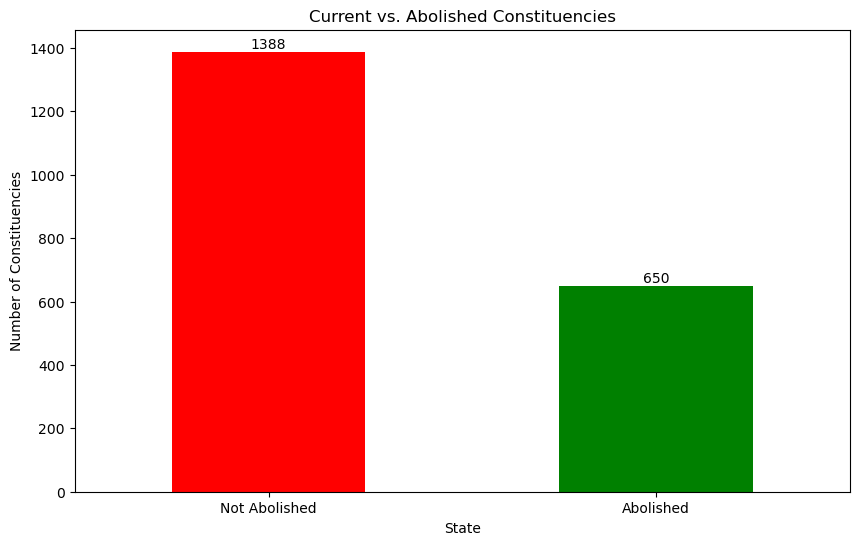

In [4]:
abolished_counts = df_all_constituencies['Abolished'].value_counts()

# ----- THE BARCHART ----- #
fig, ax = plt.subplots(figsize=(10, 6))
abolished_counts.plot(kind='bar', ax=ax, color=['red', 'green'])  # Red for abolished, green for not abolished
ax.set_title('Current vs. Abolished Constituencies')
ax.set_xlabel('State')
ax.set_ylabel('Number of Constituencies')

# Display the count values on top of the bars
for i, count in enumerate(abolished_counts):
    ax.text(i, count + 0.1, str(count), ha='center', va='bottom')

ax.set_xticklabels(['Not Abolished', 'Abolished'], rotation=0)

plt.show()

2. Number of Constituencies in Each Nation Within the UK.

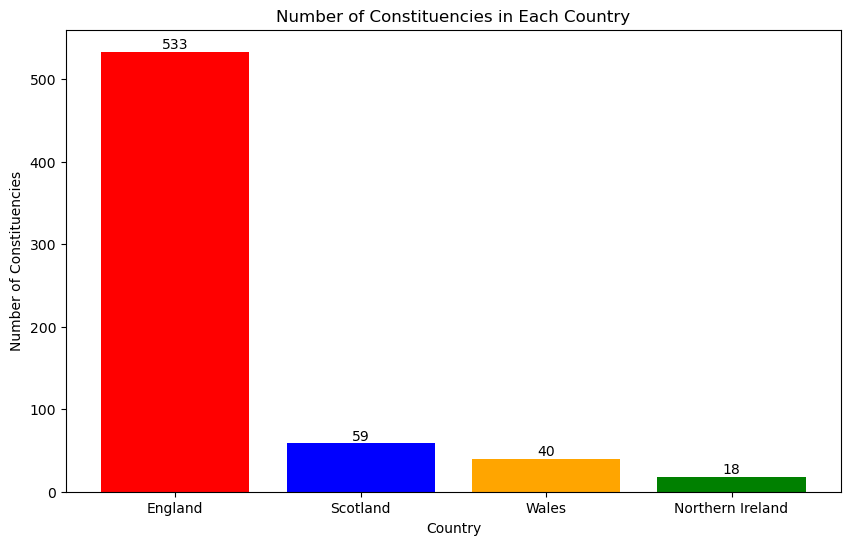

In [5]:
selected_countries = ['England', 'Scotland', 'Wales', 'Northern Ireland']
filtered_df = df_all_constituencies[df_all_constituencies['Country'].isin(selected_countries)]

# Count the occurrences of each country
country_counts = filtered_df['Country'].value_counts()

# Plot the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars = plt.bar(country_counts.index, country_counts.values, color=['red', 'blue', 'orange', 'green'])
# Display counts on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.xlabel('Country')
plt.ylabel('Number of Constituencies')
plt.title('Number of Constituencies in Each Country')
plt.show()

3. The Range of Electorates.

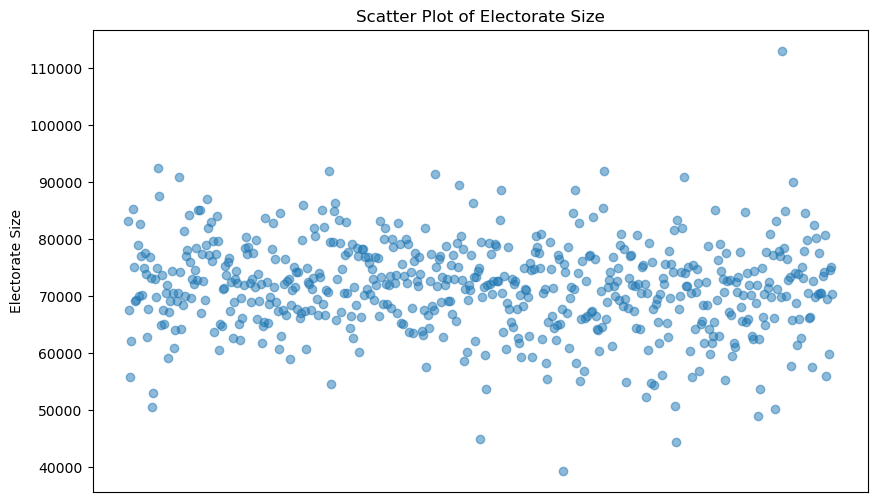

In [6]:
constituency_titles = [] 
for i in range(len(df_all_constituencies)):
    if pd.notna(df_all_constituencies['Electorate Size'][i]):
        constituency_titles.append(df_all_constituencies['Constituency Titles'][i])

electorate_size = df_all_constituencies['Electorate Size'].dropna()

fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(range(len(electorate_size)), electorate_size, alpha=0.5)

plt.ylabel('Electorate Size')
plt.title('Scatter Plot of Electorate Size')

ax.set_xticks([])

plt.show()

4. Electorate, vs. Turnout.

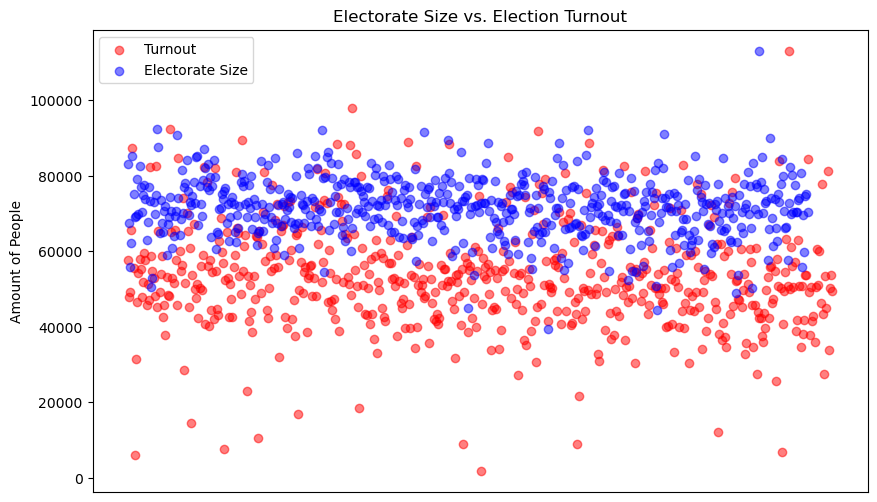

In [7]:
constituency_turnout = [] 
for i in range(len(df_all_constituencies)):
    if pd.notna(df_all_constituencies['(Most Recent) Turnout'][i]):
        constituency_turnout.append(df_all_constituencies['Constituency Titles'][i])

turnout = df_all_constituencies['(Most Recent) Turnout'].dropna()

fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(range(len(turnout)), turnout, alpha=0.5, color = 'red', label='Turnout')
plt.scatter(range(len(electorate_size)), electorate_size, alpha=0.5, color = 'blue', label = 'Electorate Size')
plt.ylabel('Amount of People')
plt.title('Electorate Size vs. Election Turnout')

ax.legend()
ax.set_xticks([])

plt.show()


**NOTE:** sometimes turnout may be larger than the size of the electorate - this is most probably due to there being no recent data on the constituency's Wikipedia article, and so should be noted when critically assessing my findings.

#### Comparing 20 Random Constituencies' Electorate vs. Turnout

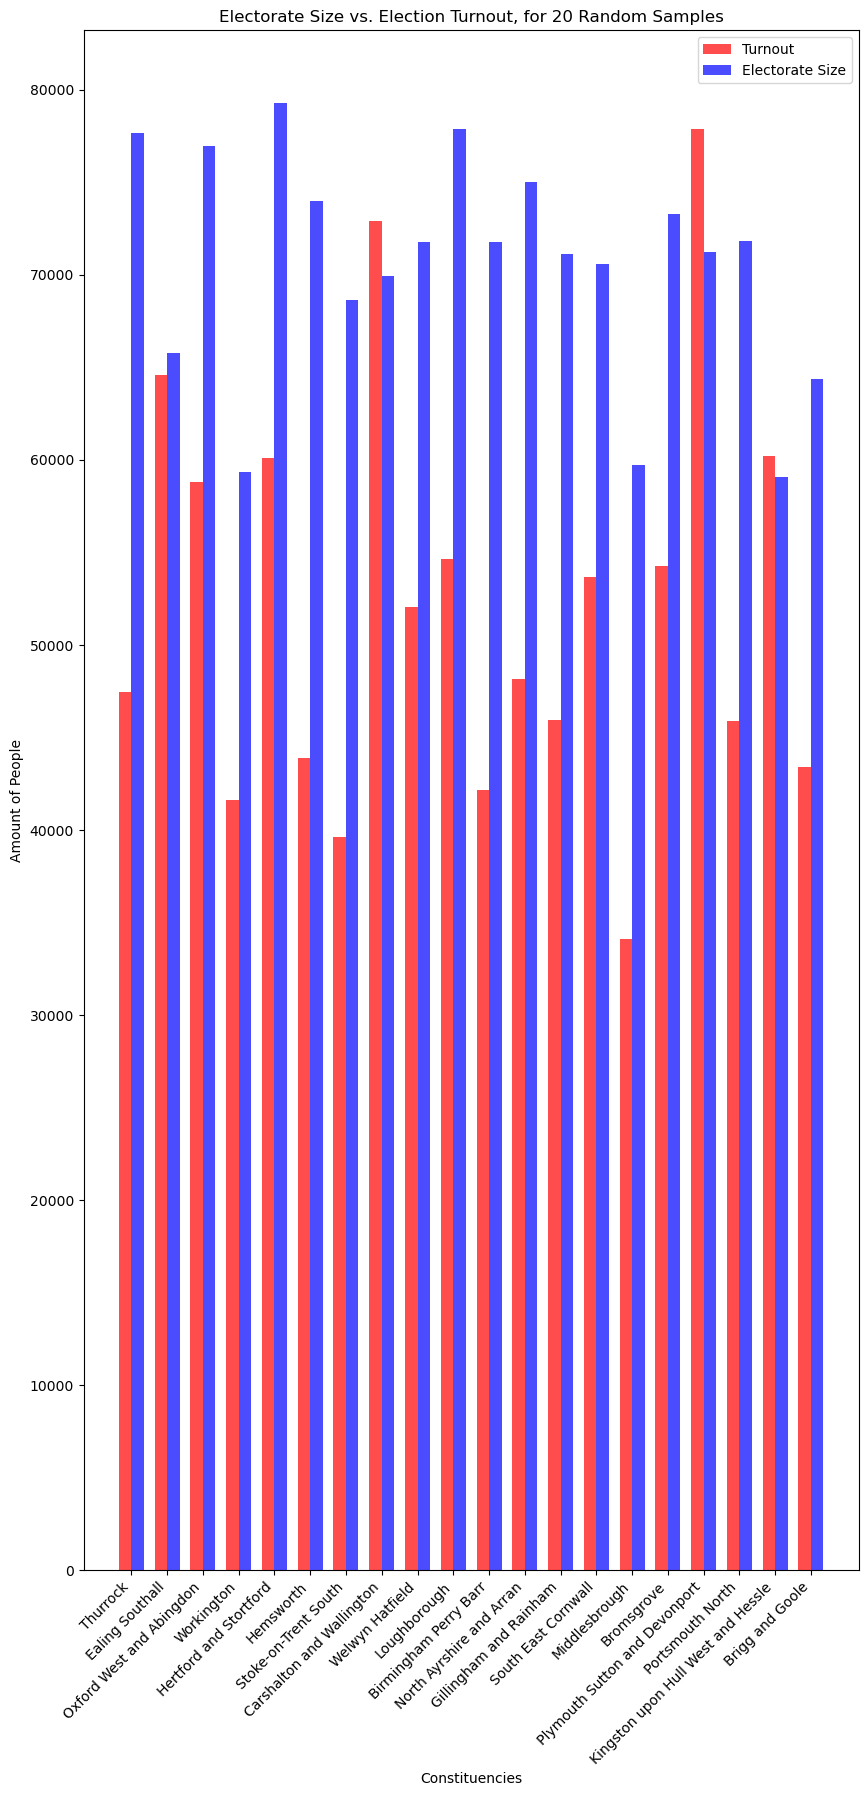

In [8]:
turnout = []
electorate_size = []
constituency_titles = []

for index, row in df_all_constituencies.iterrows():
    title = row['Constituency Titles']
    size = row['Electorate Size']
    turnout_value = row['(Most Recent) Turnout']

    if pd.notna(size) and pd.notna(turnout_value):
        constituency_titles.append(title)
        electorate_size.append(size)
        turnout.append(turnout_value)

# there are hundreds of values, so I am going to show 20 randomly picked constituencies
random_turnout = []
random_electorate_size = []
random_constituency_titles = []
random_indices = np.random.choice(len(turnout), 20, replace=False)

for i in random_indices:
    random_turnout.append(turnout[int(i)])
    random_electorate_size.append(electorate_size[int(i)])
    random_constituency_titles.append(constituency_titles[int(i)])

# and so then I will plot the graph for these 20 constituencies
index = np.arange(len(random_constituency_titles))

bar_width = 0.35

fig, ax = plt.subplots(figsize=(10,20))
bar1 = ax.bar(index, random_turnout, bar_width, label='Turnout', color='red', alpha=0.7)
bar2 = ax.bar(index + bar_width, random_electorate_size, bar_width, label='Electorate Size', color='blue', alpha=0.7)

ax.set_xlabel('Constituencies')
ax.set_ylabel('Amount of People')
ax.set_title('Electorate Size vs. Election Turnout, for 20 Random Samples')

ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(random_constituency_titles, rotation=45, ha='right')


ax.legend()

plt.show()

**NOTE:** see the previous graph, where I explained that due to lack of recent data, sometimes turnout is greater than the size of the electorate.

##### Finding Averages
1. Average Electorate Size and Turnout.

In [9]:
average_turnout = np.mean(turnout)
print("Average Constituncy Turnout is", average_turnout)
average_electorate_size = np.mean(electorate_size)
print("Average Electorate Size is", average_electorate_size)

Average Constituncy Turnout is 53907.08566108008
Average Electorate Size is 71705.15456238361


2. Scatterplot of the Average Electorate Size and Turnout.

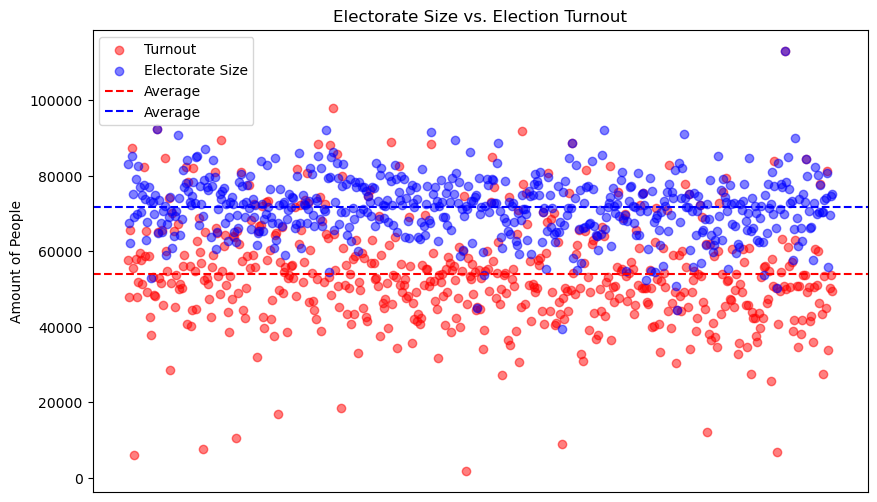

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(range(len(turnout)), turnout, alpha=0.5, color = 'red', label='Turnout')
plt.scatter(range(len(electorate_size)), electorate_size, alpha=0.5, color = 'blue', label = 'Electorate Size')

# ----- PLOTTING THE AVERAGES ----- #
plt.axhline(y=average_turnout, color='red', linestyle='--', label='Average')
plt.axhline(y=average_electorate_size, color='blue', linestyle='--', label='Average')

plt.ylabel('Amount of People')
plt.title('Electorate Size vs. Election Turnout')

ax.legend()
ax.set_xticks([])

plt.show()

#### Most Common Words in Constituency Titles
Using ChatGPT due to unfamiliarity with `defaultdict`, I created a barchart to show the most common words - excluding filler words.

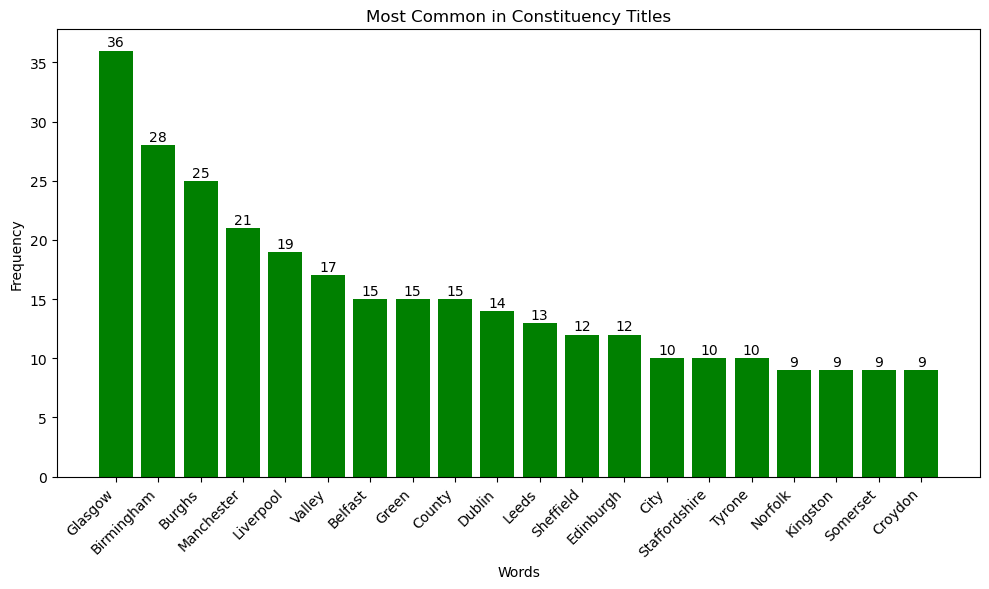

In [11]:
from collections import defaultdict # suggested by ChatGPT to collect this data

constituency_titles = df_all_constituencies['Constituency Titles'].values.tolist()
def count_words(constituency_titles):
    word_count = defaultdict(int)
    for phrase in constituency_titles:
        words = phrase.split()
        for word in words:
            word_count[word] += 1
    
    sorted_word_count = dict(sorted(word_count.items(), key=lambda item: item[1], reverse=True))
    return sorted_word_count

common_words = count_words(constituency_titles)

# excluding articles and other words which are of little interest
words_to_exclude = ['North', 'South', 'East', 'West', 'Central', 'St', 'Mid', 'upon', 'and', 'of']
for word in words_to_exclude:
    common_words.pop(word, None)

top_words = dict(list(common_words.items())[:20])

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(top_words.keys(), top_words.values())
ax.set_xlabel('Words')
ax.set_ylabel('Frequency')
ax.set_title('Most Common in Constituency Titles')
bars = ax.bar(top_words.keys(), top_words.values(), color='green')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 2), ha='center', va='bottom')

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()